In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ls

Ads_CTR_Optimisation.csv  UCB_Algorithm_Slide.png  upper_confidence_bound.py
random_selection.py       UCB.ipynb


In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [6]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [7]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward+delta_i
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_reward+=reward

In [8]:
total_reward

2178

In [13]:
print(ads_selected.count(0))
print(ads_selected.count(1))
print(ads_selected.count(2))
print(ads_selected.count(3))
print(ads_selected.count(4))
print(ads_selected.count(5))
print(ads_selected.count(6))
print(ads_selected.count(7))
print(ads_selected.count(8))
print(ads_selected.count(9))

705
387
186
345
6323
150
292
1170
256
186


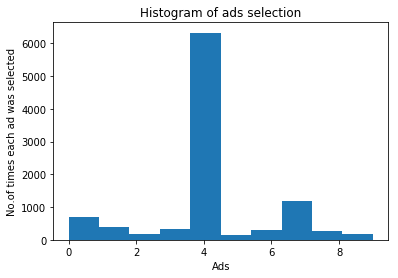

In [14]:
#Visualizing results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('No.of times each ad was selected')
plt.show()